
<font size = 5 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 4 >In this Exercise the main purpose is to learn the structure and features of the Boosting models & Neural Networks. Because the ANN are in every domain of Data Science the need for them knowledge is obligational. Therefore, in this Exercise you need to train different structures of NN's & XGBoost model with main goal of finding the top 3 models for the given Dataset.</font>

<font color = 'Orange' size = 4 > Structure of the Dataset </font>

<font color = 'Orange'>
In this Dataset you have historical informations about the Bitcoin price in the next day and thirty days before.
<li>Target column (Y): Closе - closed price for the next day of the Bitcoin</li>
<li>X columns: Close_i {i e [1,30]}</li>
<li>Close_i: Closed price of the Bitcoin i days ago</li>

</font>


<font color = 'Orange' size = 4 > Train XGBoost model </font>

<font color = 'Orange' size = 4 > Train different NN's </font>
<ul>
<font color = 'Orange'>
Try to train different kinds of NN's structures
<li>Choose the number of layers your model will have</li>
<li>Choose the number of neurons in each hidden layer</li>
<li>Choose activation function for each layer: relu, sigmoid, softmax, softsign, linear,... </li>
<li>Choose the loss function for compiling: mean_squared_error, mean_absolute_error, root_mean_squared_error, ....</li>
<li>Choose the optimizer function for compiling: adam, adagrad, adamax, sgd,....</li>
<li>Choose the number of epochs and the batch size for the training part</li>
</ul>

<ul>

<font color = 'Orange'>
Save the three best models in a table with the given columns
<li>Number of the model</li>
<li>Number of layers</li>
<li>Number of neurons in each layer</li>
<li>Activation function for each layer</li>
<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>Number of epochs</li>
<li>Batch size</li>
<li>R2 score for the prediction of the test part (this is the metric for rating the models)</li>

</ul>
</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/content/drive/MyDrive/Data_Science-Datasets/BTC_dataset.csv')

**Structure of the Dataset**

In [3]:
data

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,2020-12-10,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590,16276.343750,15701.339840,15290.902340
1428,2020-12-11,18058.904300,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590,16276.343750,15701.339840
1429,2020-12-12,18803.656250,18058.904300,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590,16276.343750
1430,2020-12-13,19142.382810,18803.656250,18058.904300,18264.992190,18553.916020,18321.144530,19191.630860,19345.121090,19154.230470,18699.765630,19445.398440,19201.091800,18802.998050,19625.835940,18177.484380,17717.414060,17108.402340,17150.623050,18732.121090,19107.464840,18364.121090,18370.001950,18642.232420,18621.314450,17817.089840,17804.005860,17645.406250,16716.111330,15955.587890,16068.138670,16317.808590


In [4]:
data.head()

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029


In [5]:
data.shape

(1432, 32)

In [6]:
from sklearn.model_selection import train_test_split

X_data = data.drop('Close', axis=1)
Y_data = data.Close.values

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


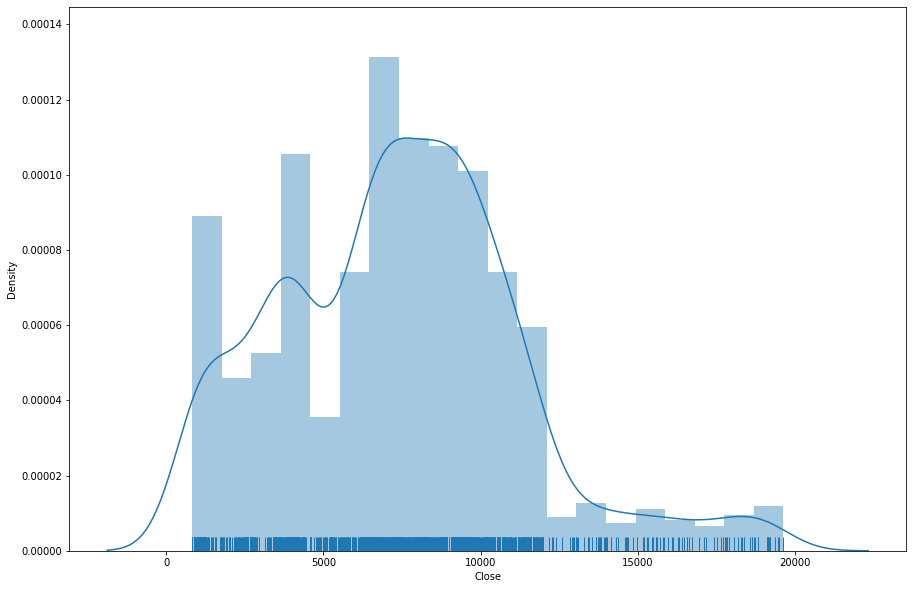

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,10))
sns.distplot(data['Close'], rug=True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Y_train = sc.fit_transform(Y_train.reshape(-1, 1))
Y_test = sc.fit_transform(Y_test.reshape(-1, 1))

In [9]:
from xgboost import XGBClassifier


#inicialize XGBoost
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200, n_jobs=-1 , verbose=1, learning_rate=0.16)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

#make prediction
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**XGBoost**

Building Regression Model - XGBoost

In [10]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)

[22:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error : 0.5781772448871983


k-fold Cross Validation using XGBoost

In [12]:
data_frame = data.copy()

In [13]:
data_frame.dropna(axis=0, subset=['Close'], inplace=True)
y = data_frame.Close
X = data_frame.drop(['Close'], axis=1).select_dtypes(exclude=['object'])

In [14]:
from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data=X,label=y)


params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[22:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,7504.710937,62.726932,7501.507650,122.710699
1,6768.166830,56.520416,6766.223307,105.844608
2,6105.959310,50.363181,6105.388184,92.850752
3,5512.184082,45.492880,5512.478516,79.211276
4,4974.796224,39.966791,4974.945313,68.810998


In [16]:
print((cv_results["test-rmse-mean"]).tail(1))

49    493.562571
Name: test-rmse-mean, dtype: float64


Visualize Boosting Trees and Feature Importance

In [17]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[22:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


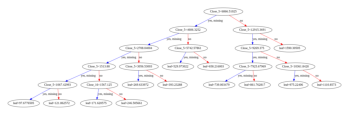

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

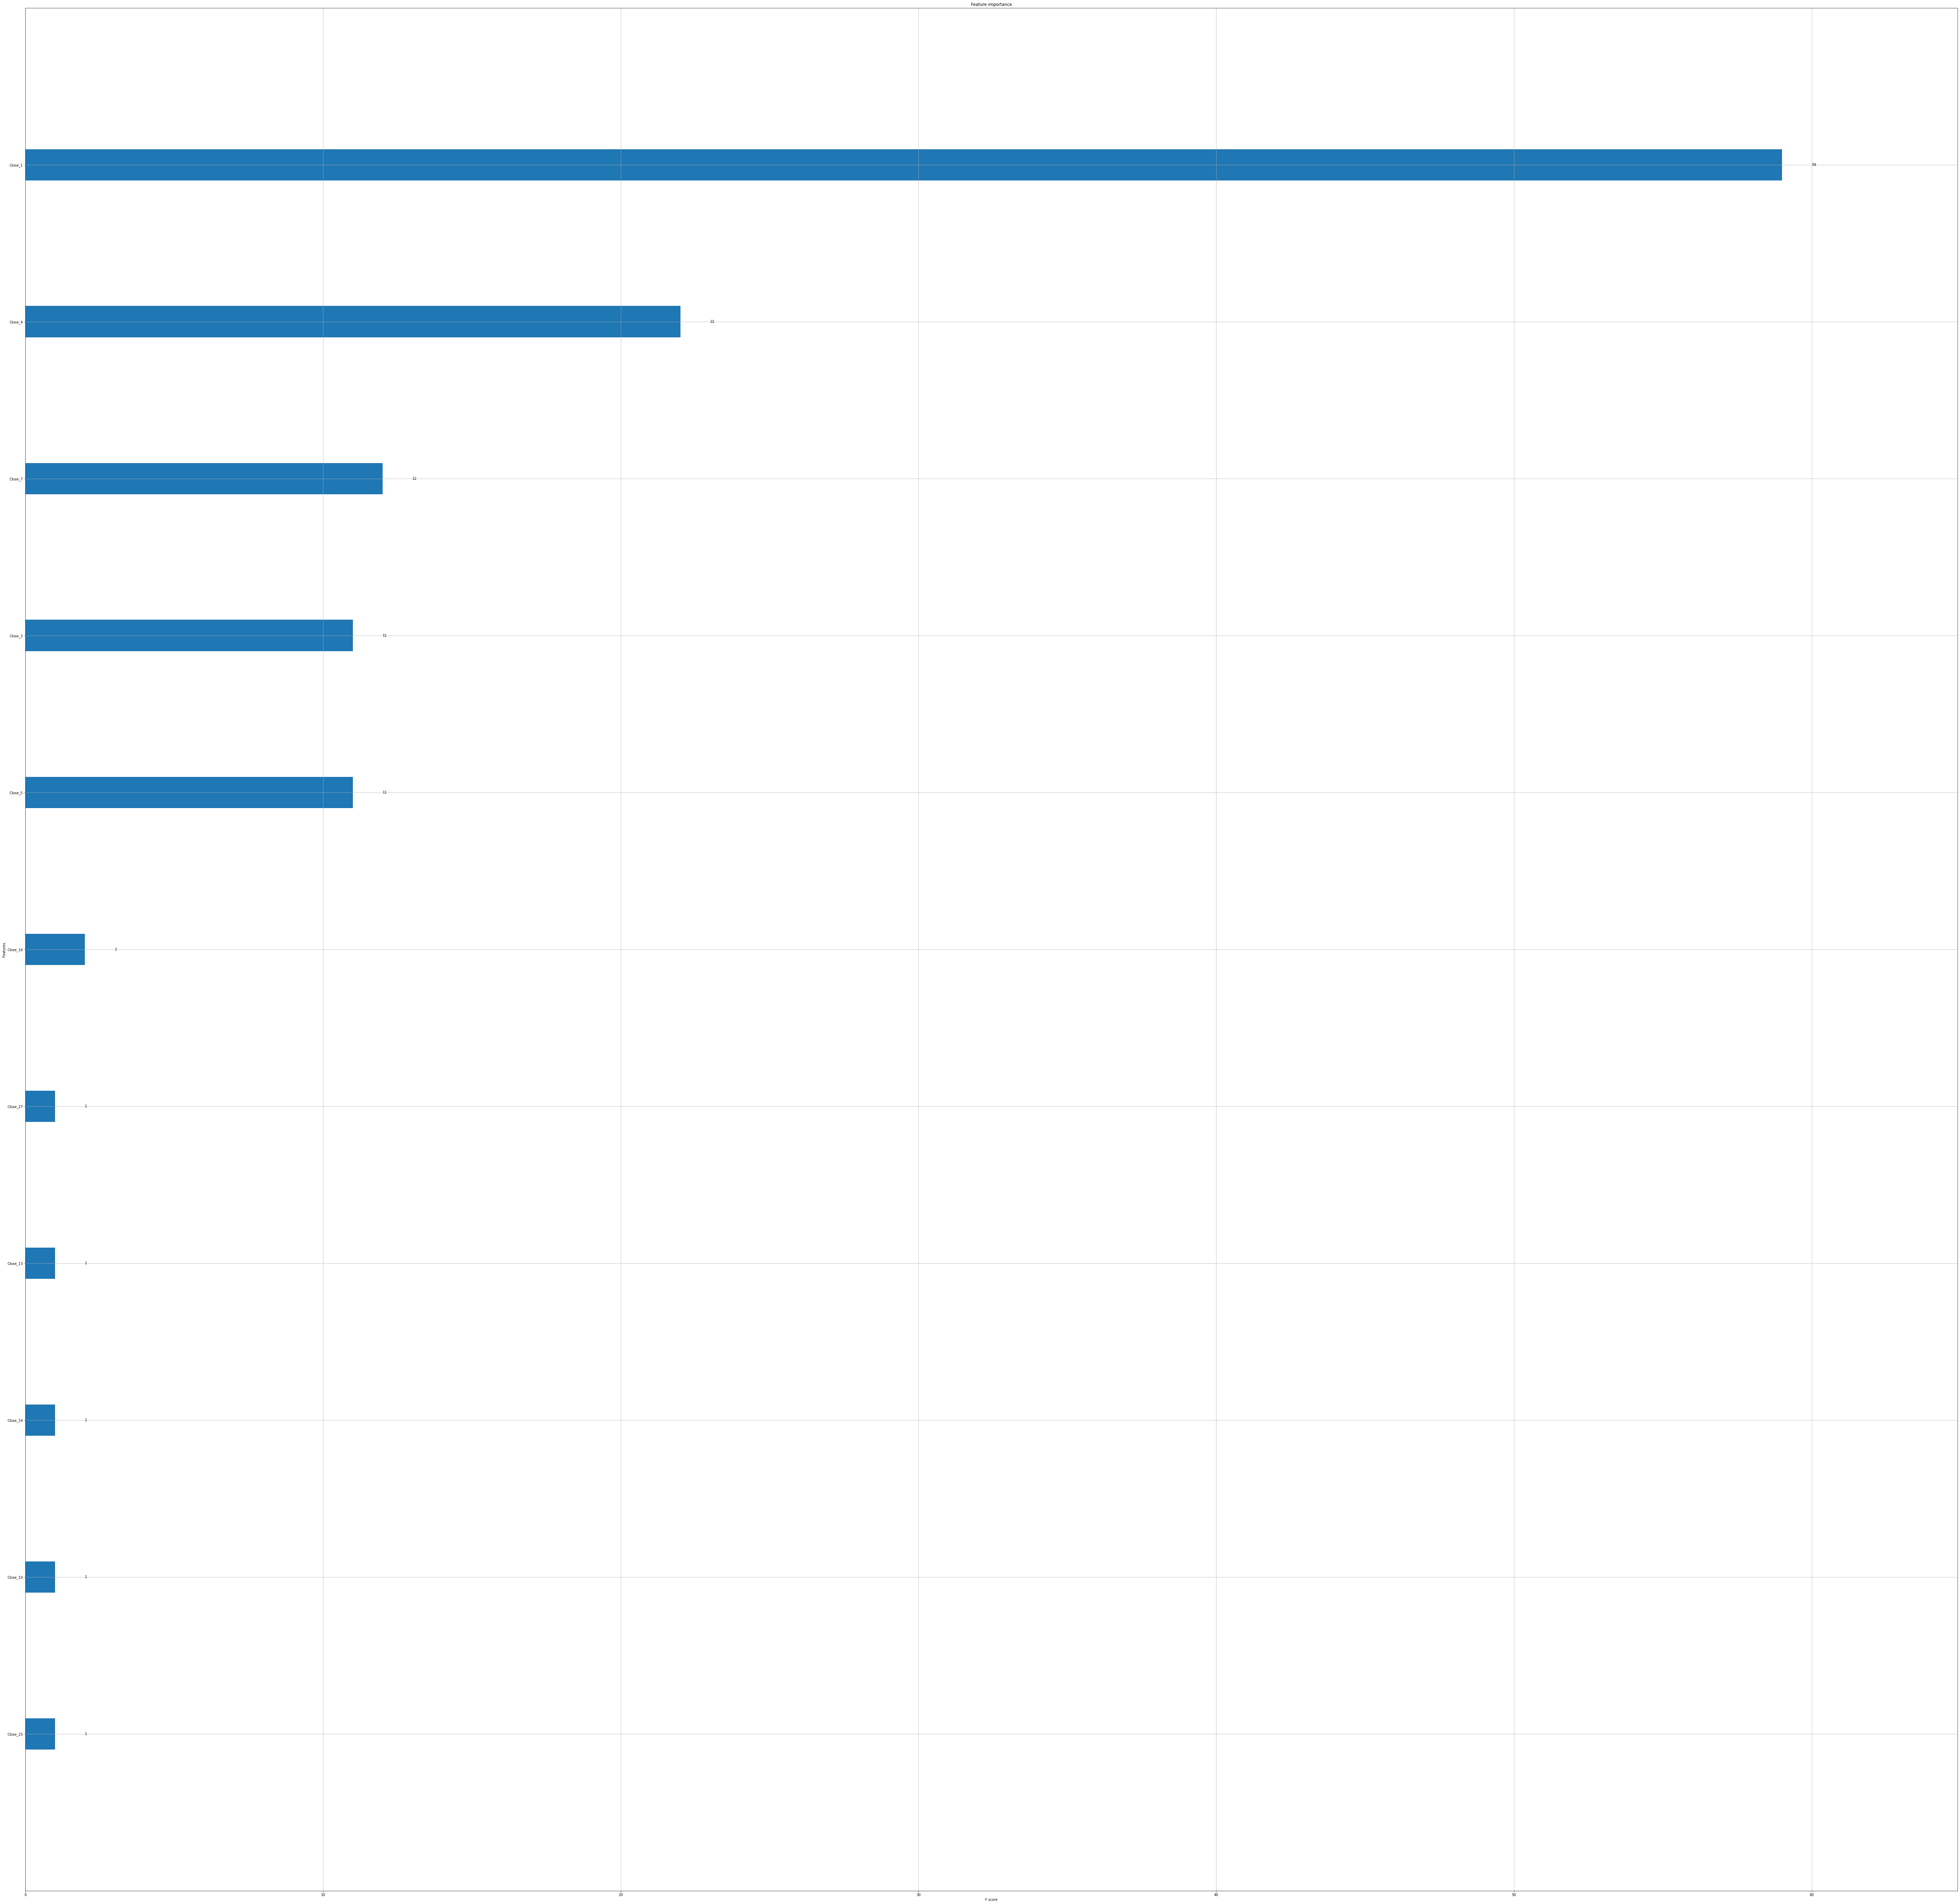

In [19]:
from xgboost import plot_importance

plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [2,2]
plt.show()

**Neural Networks**

In [20]:
data.head()

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029


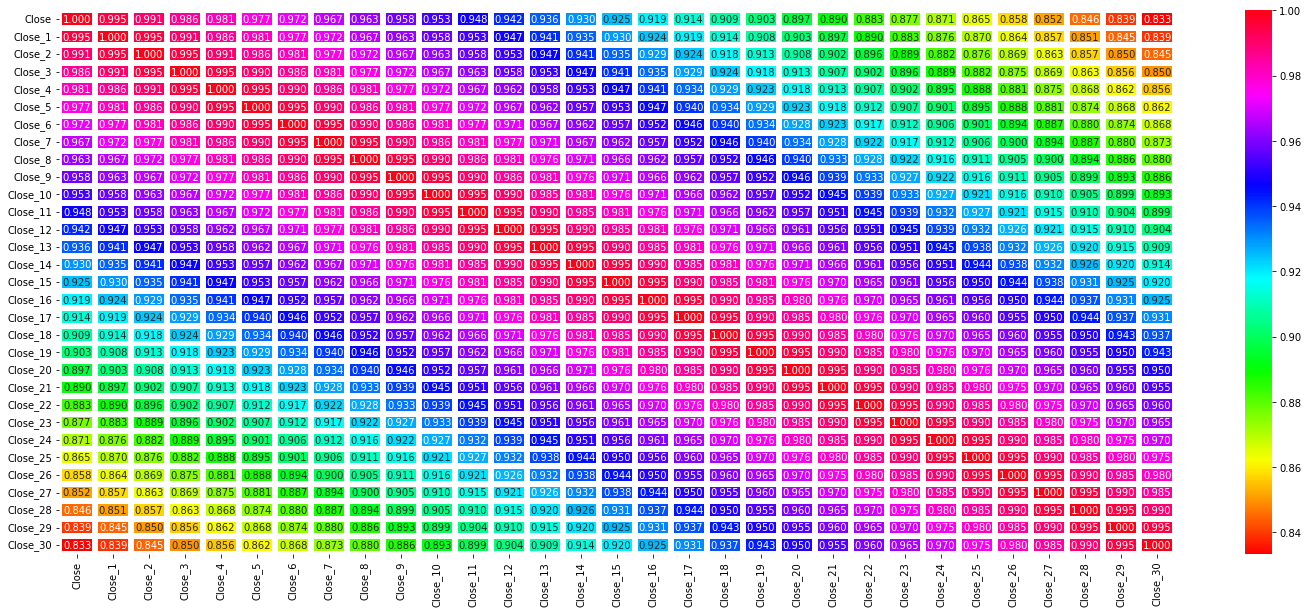

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=5)
plt.show()

**Classification Model**

In [22]:
from keras.models import Sequential
from keras.layers import Dense

models = []

In [23]:
model = Sequential()

model.add(Dense(216, input_dim=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='tanh'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 216)               6696      
                                                                 
 dense_1 (Dense)             (None, 512)               111104    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 643,625
Trainable params: 643,625
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='adam')

In [25]:
# fit the keras model on the dataset
history = model.fit(X_train, Y_train, epochs=50, batch_size=5,  verbose=1, validation_split=0.2)

Epoch 1/50
184/184 [==============================] - 2s 8ms/step - loss: 0.2096 - val_loss: 0.1602
Epoch 2/50
184/184 [==============================] - 1s 7ms/step - loss: 0.1907 - val_loss: 0.1645
Epoch 3/50
184/184 [==============================] - 1s 7ms/step - loss: 0.1889 - val_loss: 0.1571
Epoch 4/50
184/184 [==============================] - 1s 6ms/step - loss: 0.1897 - val_loss: 0.1554
Epoch 5/50
184/184 [==============================] - 1s 7ms/step - loss: 0.1857 - val_loss: 0.1571
Epoch 6/50
184/184 [==============================] - 1s 6ms/step - loss: 0.1830 - val_loss: 0.1525
Epoch 7/50
184/184 [==============================] - 1s 6ms/step - loss: 0.1835 - val_loss: 0.1600
Epoch 8/50
184/184 [==============================] - 1s 6ms/step - loss: 0.1842 - val_loss: 0.1547
Epoch 9/50
184/184 [==============================] - 1s 6ms/step - loss: 0.1849 - val_loss: 0.1520
Epoch 10/50
184/184 [==============================] - 1s 7ms/step - loss: 0.1820 - val_loss: 0.1515

In [26]:
#Predicting the Test set results
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
import numpy as np

print('r2_score: ', r2_score(Y_test, y_pred))

r2_score:  0.8293860898096469


**Training different NN's**

In [28]:
list_nn = []

In [29]:
from sklearn.metrics import r2_score

for i in range(1,6):
  info = {}
  model = Sequential()
  model.add(Dense(216, input_dim=30, kernel_initializer='uniform', activation='relu'))
  
  number_model = i

  info['Number of the model'] = number_model
  info['Number of layers'] = i
  info['Number of neurons in input layer'] = 216
  info['Activation function for input layer '] = 'relu'

  for j in range(0, i):
    info['Number of neurons in layer' + str(j + 1)] = 64
    info['Activation function for layer '+ str(j + 1)] = 'relu'

    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
  
  if i%2==0:
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mse', optimizer='adagrad')
    
    info['Loss function'] = 'mse'
    info['Optimizer function for compiling'] = 'adagrad'

  else:
    model.add(Dense(1, kernel_initializer='uniform', activation='softmax'))
    model.compile(loss='mae', optimizer='adam')
    
    info['Loss function'] = 'mae'
    info['Optimizer function for compiling'] = 'adam'

  history = model.fit(X_train, Y_train, epochs=50, batch_size=10,  verbose=1, validation_split=0.2)
  
  y_pred = model.predict(X_test)

  info['Number of epochs'] = 50
  info['Batch size'] = 10
  info['R2 score for the prediction of the test part'] = r2_score(Y_test, y_pred)

  list_nn.append(info)
  models.append(model)

Epoch 1/50
92/92 [==============================] - 1s 3ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 2/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 4/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 5/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 6/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 7/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 8/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 9/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 10/50
92/92 [==============================] - 0s 2ms/step - loss: 1.1809 - val_loss: 1.2322
Epoch 11/50
92/92 [

In [30]:
from sklearn.metrics import r2_score

for i in range(1,6):
  info = {}
  model = Sequential()
  model.add(Dense(256, input_dim=30, kernel_initializer='normal', activation='relu'))
  
  number_model = number_model + 1

  info['Number of the model'] = number_model
  info['Number of layers'] = i
  info['Number of neurons in input layer'] = 256
  info['Activation function for input layer '] = 'relu'

  for j in range(0, i):
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    
    info['Number of neurons in layer' + str(j + 1)] = 512
    info['Activation function for layer '+ str(j + 1)] = 'relu'    
  
  if i%2==0:
    model.add(Dense(1, kernel_initializer='normal', activation='softsign'))
    model.compile(loss='mse', optimizer='adamax')
    
    info['Loss function'] = 'mse'
    info['Optimizer function for compiling'] = 'adamax'

  else:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mae', optimizer='sgd')
    
    info['Loss function'] = 'mae'
    info['Optimizer function for compiling'] = 'sgd'

  history = model.fit(X_train, Y_train, epochs=100, batch_size=25,  verbose=1, validation_split=0.2)
  
  y_pred = model.predict(X_test)

  info['Number of epochs'] = 100
  info['Batch size'] = 25
  info['R2 score for the prediction of the test part'] = r2_score(Y_test, y_pred)

  list_nn.append(info)
  models.append(model)

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 0.3275 - val_loss: 0.1889
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.1729 - val_loss: 0.1513
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1491 - val_loss: 0.1275
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.1311 - val_loss: 0.1263
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1215 - val_loss: 0.1074
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1173 - val_loss: 0.1190
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1110 - val_loss: 0.0903
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1081 - val_loss: 0.1174
Epoch 9/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1051 - val_loss: 0.0919
Epoch 10/100
37/37 [==============================] - 0s 5ms/step - loss: 0.1003 - val_loss: 0.1081
Epoch 11/

In [31]:
list_nn

[{'Activation function for input layer ': 'relu',
  'Activation function for layer 1': 'relu',
  'Batch size': 10,
  'Loss function': 'mae',
  'Number of epochs': 50,
  'Number of layers': 1,
  'Number of neurons in input layer': 216,
  'Number of neurons in layer1': 64,
  'Number of the model': 1,
  'Optimizer function for compiling': 'adam',
  'R2 score for the prediction of the test part': -1.0},
 {'Activation function for input layer ': 'relu',
  'Activation function for layer 1': 'relu',
  'Activation function for layer 2': 'relu',
  'Batch size': 10,
  'Loss function': 'mse',
  'Number of epochs': 50,
  'Number of layers': 2,
  'Number of neurons in input layer': 216,
  'Number of neurons in layer1': 64,
  'Number of neurons in layer2': 64,
  'Number of the model': 2,
  'Optimizer function for compiling': 'adagrad',
  'R2 score for the prediction of the test part': 0.23783476727029862},
 {'Activation function for input layer ': 'relu',
  'Activation function for layer 1': 'relu',

Вредностите на коефициентот на детерминираност 𝑅² се движат во граници помеѓу -1 и 1.

 

*   Ако вредноста на 𝑅² е блиска или еднаква на 1 тоа значи дека регресиониот модел е добар и дека нема грешки во моделот.
*   Ако вредноста на 𝑅² е помала од 0 тоа значи дека регресиониот модел е полош од средната вредност.

*   Ако вредноста на 𝑅² е еднаква на 0 тоа значи дека регресиониот модел е еднаков на средната вредност.

Во листата list_nn се содржат сите информации за тренираните невронски мрежи која што за да ги има трите најдобри модели потребно е да се сортира според опаѓачки редослед на соодветните 𝑅² вредности.

In [32]:
ordered_List = sorted(list_nn, key=lambda k: k['R2 score for the prediction of the test part'], reverse=True)

In [33]:
three_best_models = [ordered_List[0], ordered_List[1], ordered_List[2]]
data_frame = pd.DataFrame(three_best_models)
data_frame

,Number of the model,Number of layers,Number of neurons in input layer,Activation function for input layer,Number of neurons in layer1,Activation function for layer 1,Loss function,Optimizer function for compiling,Number of epochs,Batch size,R2 score for the prediction of the test part,Number of neurons in layer2,Activation function for layer 2,Number of neurons in layer3,Activation function for layer 3,Number of neurons in layer4,Activation function for layer 4,Number of neurons in layer5,Activation function for layer 5
0,6,1,256,relu,512,relu,mae,sgd,100,25,0.981997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,5,256,relu,512,relu,mae,sgd,100,25,0.981955,512.0,relu,512.0,relu,512.0,relu,512.0,relu
2,8,3,256,relu,512,relu,mae,sgd,100,25,0.981683,512.0,relu,512.0,relu,NaN,NaN,NaN,NaN


In [34]:
three_best_models = [ordered_List[0], ordered_List[1], ordered_List[2]]
data_frame = pd.DataFrame(three_best_models)
data_frame

,Number of the model,Number of layers,Number of neurons in input layer,Activation function for input layer,Number of neurons in layer1,Activation function for layer 1,Loss function,Optimizer function for compiling,Number of epochs,Batch size,R2 score for the prediction of the test part,Number of neurons in layer2,Activation function for layer 2,Number of neurons in layer3,Activation function for layer 3,Number of neurons in layer4,Activation function for layer 4,Number of neurons in layer5,Activation function for layer 5
0,6,1,256,relu,512,relu,mae,sgd,100,25,0.981997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,5,256,relu,512,relu,mae,sgd,100,25,0.981955,512.0,relu,512.0,relu,512.0,relu,512.0,relu
2,8,3,256,relu,512,relu,mae,sgd,100,25,0.981683,512.0,relu,512.0,relu,NaN,NaN,NaN,NaN
